# AI Assitant:
## GitHub Copilot with ChatGPT 5 mini

How Do I import these libs?

In [20]:
# Import pandas, numpy, pyplot and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

I have a csv file called card_transdata.csv. Read it into a dataframe called card_data

In [21]:
# Read CSV into dataframe
card_data = pd.read_csv('card_transdata.csv')
card_data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0
1,10.829943,0.175592,1.294219,1.0,NaN,0.0,0.0,0
2,5.091079,NaN,0.427715,1.0,0.0,0.0,1.0,0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0


Make a cell printing out the head and another cell printing the info for card_data.

In [22]:
# Print the head of card_data
print(card_data.head())

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                             NaN   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        NaN   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0      0  
1              0.0           0.0      0  
2              0.0           1.0      0  
3              0.0           1.0      0  
4              0.0           1.0      0  


In [23]:
# Print info() for card_data
card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              999 non-null    float64
 1   distance_from_last_transaction  996 non-null    float64
 2   ratio_to_median_purchase_price  997 non-null    float64
 3   repeat_retailer                 992 non-null    float64
 4   used_chip                       995 non-null    float64
 5   used_pin_number                 997 non-null    float64
 6   online_order                    995 non-null    float64
 7   fraud                           999 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 62.6 KB


In a new cell, sum up the number of null-values per column and print it out as a new series.

In [24]:
# Count nulls per column and print as a Series
null_counts = card_data.isnull().sum()
print(null_counts)

distance_from_home                0
distance_from_last_transaction    3
ratio_to_median_purchase_price    2
repeat_retailer                   7
used_chip                         4
used_pin_number                   2
online_order                      4
fraud                             0
dtype: int64


Then in another cell, remove the null values.

In [25]:
# Remove rows with any null values and update card_data
print('Before:', card_data.shape)
card_data = card_data.dropna().reset_index(drop=True)
print('After:', card_data.shape)

Before: (999, 8)
After: (977, 8)


Make a seaborn countplot of the card_data for the fraud column. Rename the title to "Fraud Class Ditribution". Make similar plots for the used_pin, repeat_retailer, online_order, and ratio_to_median_purchase_price columns. Rename the titles to "Used Pin Distribution", "Repeat Retailer Distribution", "Online Orders", and "Ratio to Median Purchase Price" respectively.

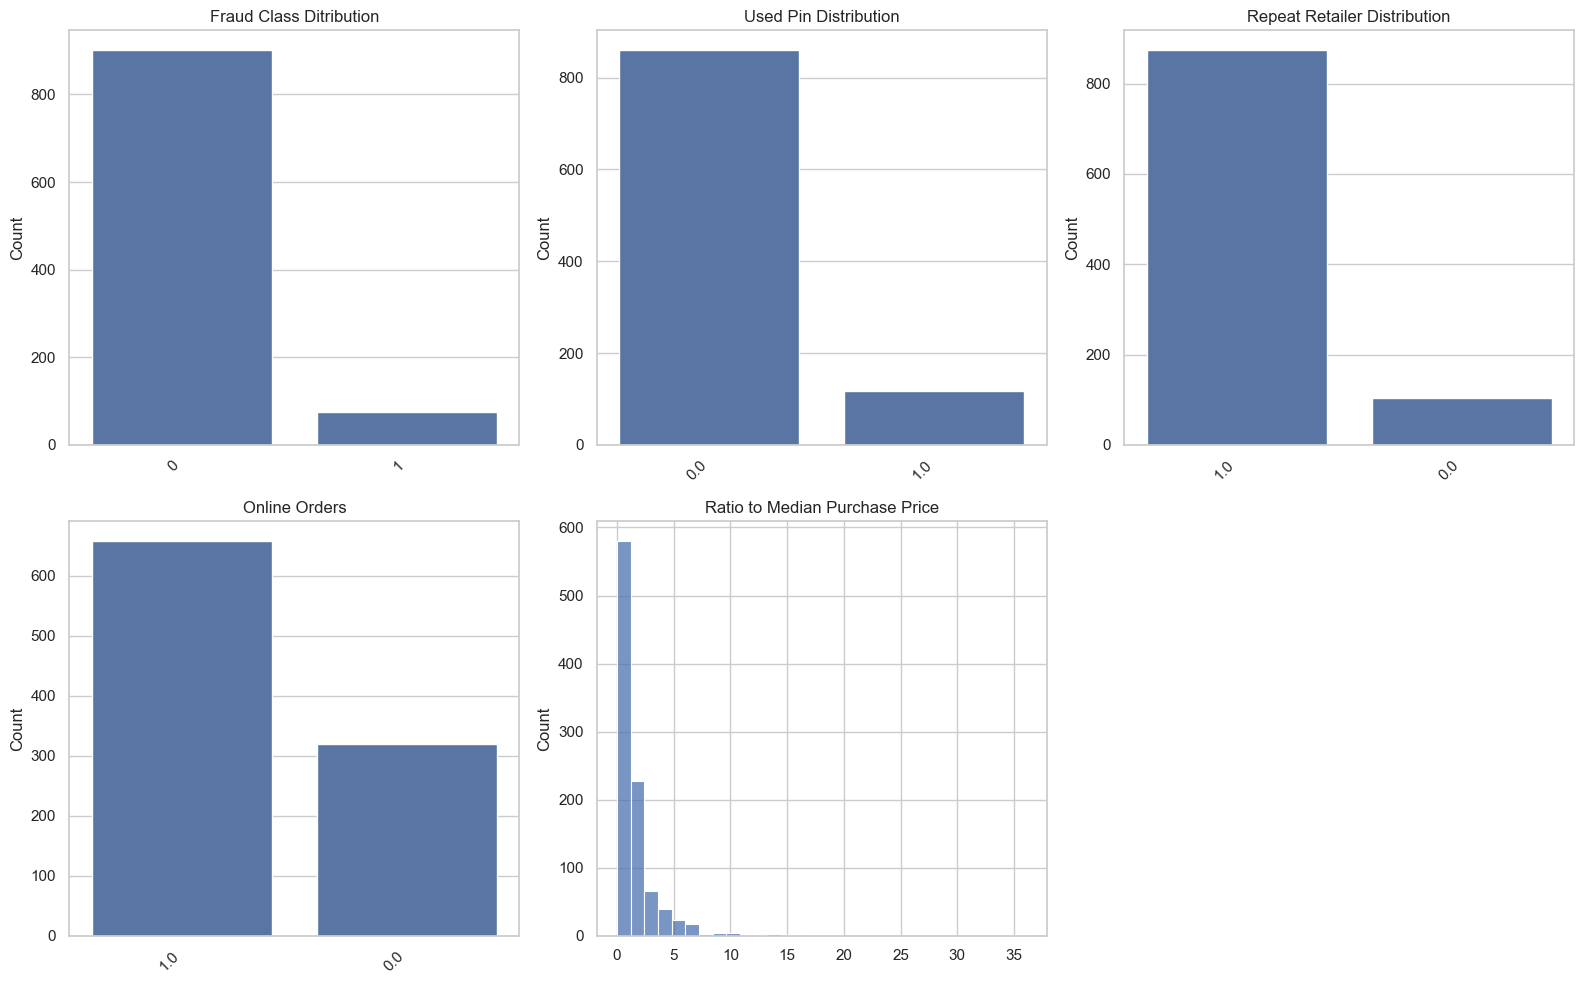

In [26]:
# Plot countplots (use histplot fallback for high-cardinality numeric column)
import matplotlib.pyplot as plt
import seaborn as sns

cols_titles = {
    'fraud': 'Fraud Class Ditribution',
    'used_pin_number': 'Used Pin Distribution',
    'repeat_retailer': 'Repeat Retailer Distribution',
    'online_order': 'Online Orders',
    'ratio_to_median_purchase_price': 'Ratio to Median Purchase Price',
}

plt.figure(figsize=(16,10))
for i, (col, title) in enumerate(cols_titles.items(), start=1):
    plt.subplot(2, 3, i)
    series = card_data[col].dropna()
    # If column is high-cardinality numeric, show histogram instead of countplot
    if series.dtype.kind in 'biufc' and series.nunique() > 30:
        sns.histplot(series, bins=30, kde=False)
    else:
        # order categories by frequency for clearer bars
        order = series.value_counts().index
        sns.countplot(x=series, order=order)
        plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()

Make an sns countplot on used_pin_number using fraud as the hue. Make fraudulant transactions red and normal ones green. Rename the title and axis labels to make sense. Add a legend for the hue.

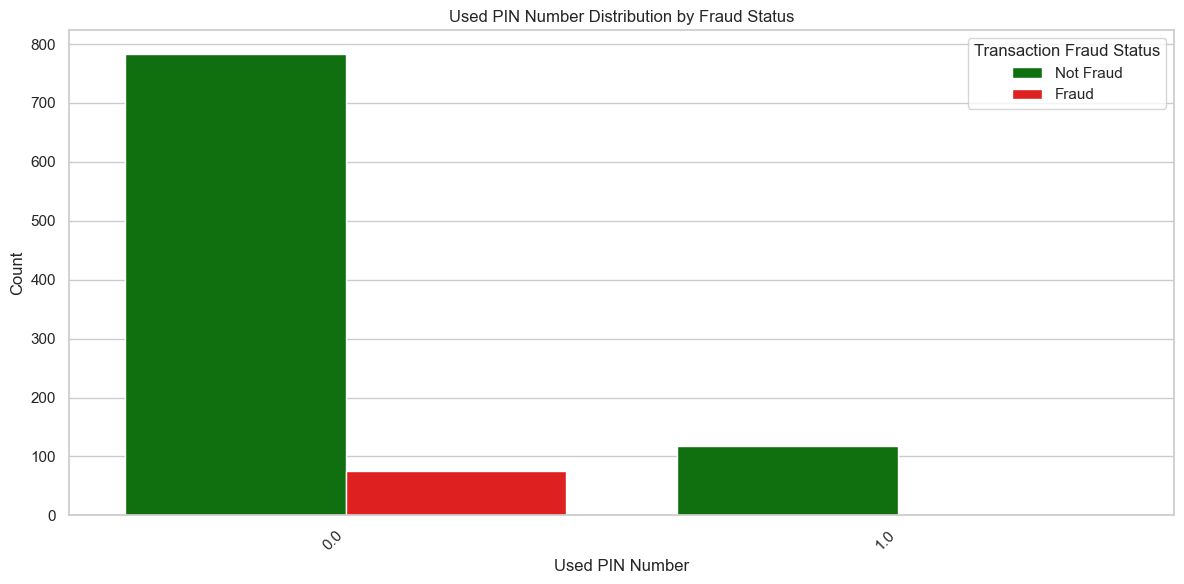

In [27]:
# Countplot of used_pin_number with fraud as hue
plt.figure(figsize=(12,6))
df_plot = card_data[['used_pin_number','fraud']].dropna()

# Build a robust palette: treat common truthy labels as fraud (red), others as normal (green)
unique_fraud_vals = df_plot['fraud'].unique()
palette = {
    v: ('red' if str(v).lower() in ['1','true','yes','y','fraud','fraudulent','fraudulant'] else 'green')
    for v in unique_fraud_vals
}

sns.countplot(
    x='used_pin_number',
    hue='fraud',
    data=df_plot,
    palette=palette
)

plt.title('Used PIN Number Distribution by Fraud Status')
plt.xlabel('Used PIN Number')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Transaction Fraud Status', labels=['Not Fraud', 'Fraud'])
plt.tight_layout()

Make an sns stacked bar graph using fraud as the hue. The x-axis should have used_pin_number. The y-axis should show the percent of data that is fraud calculated using a groupby on used_pin_number and getting the count in the fraud column. Then graph that result. The fraud data should be red and green otherwise.

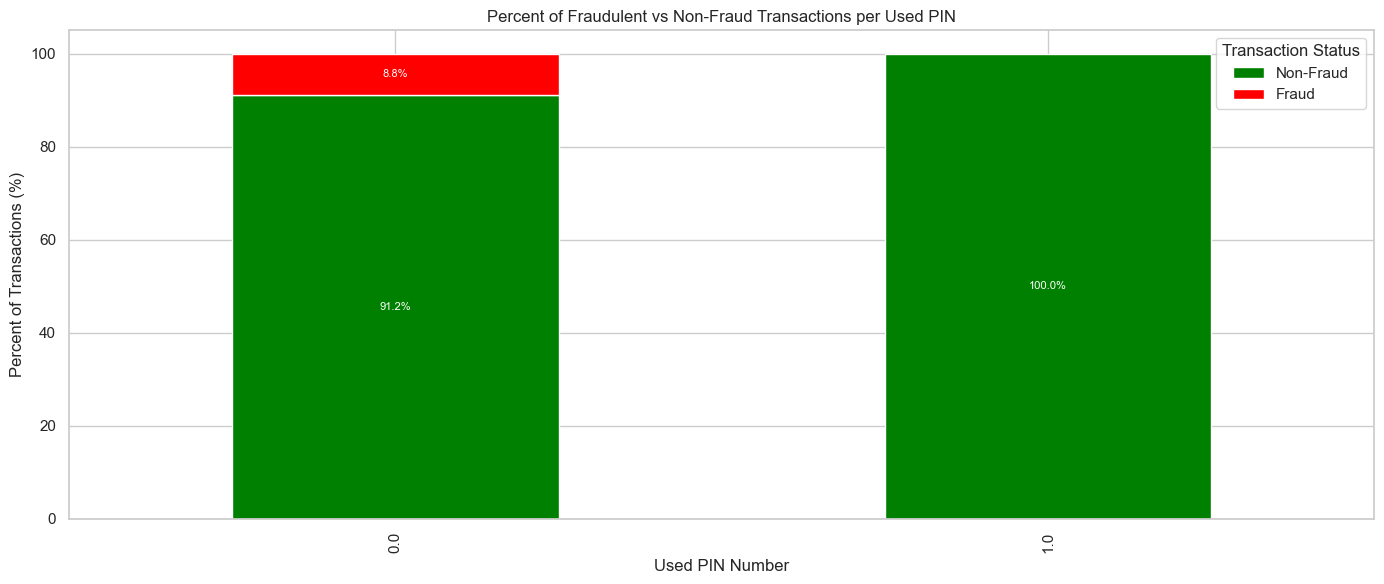

In [28]:
# Stacked percent bar by used_pin_number (Fraud=red, Non-Fraud=green)
sns.set_theme(style='whitegrid')

# Prepare data and robustly interpret fraud flag
df = card_data[['used_pin_number', 'fraud']].copy()
df['is_fraud'] = df['fraud'].astype(str).str.lower().isin(['1','true','yes','y','fraud','fraudulent','fraudulant'])

# Group and get counts per PIN for fraud vs non-fraud
counts = df.groupby(['used_pin_number', 'is_fraud']).size().unstack(fill_value=0)
# Ensure both False/True columns exist and order as Non-Fraud, Fraud
counts = counts.reindex(columns=[False, True], fill_value=0)

# Convert counts to percentages per used_pin_number
pct = counts.div(counts.sum(axis=1), axis=0) * 100

# Sort by fraud percent (optional) to make plot more informative
pct = pct.sort_values(by=True, ascending=False)

# Plot stacked percent bars using pandas/matplotlib with seaborn colors
colors = ['green', 'red']  # Non-Fraud, Fraud
ax = pct.plot(kind='bar', stacked=True, color=colors, figsize=(14,6))
ax.set_xlabel('Used PIN Number')
ax.set_ylabel('Percent of Transactions (%)')
ax.set_title('Percent of Fraudulent vs Non-Fraud Transactions per Used PIN')
ax.legend(['Non-Fraud', 'Fraud'], title='Transaction Status')
plt.xticks(rotation=90)

# Add percent labels inside bar segments for segments large enough to show
for p in ax.patches:
    h = p.get_height()
    if h > 0.5:
        ax.text(p.get_x() + p.get_width() / 2, p.get_y() + h / 2, f'{h:.1f}%',
                ha='center', va='center', color='white', fontsize=8)

plt.tight_layout()

Make similar plots as the two plots at the bottom of this file. Use similar processes but instead of using used_pin_number, replace it with used_chip.

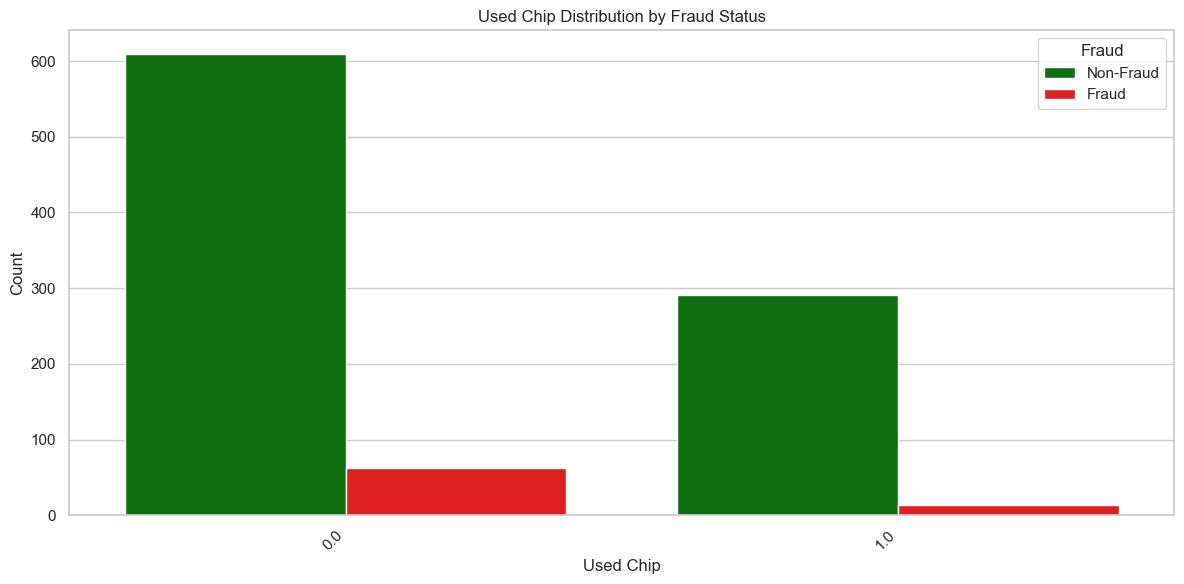

In [29]:
# Countplot of used_chip with fraud as hue
plt.figure(figsize=(12,6))
df_plot = card_data[['used_chip','fraud']].dropna()

# Robust palette mapping: common truthy fraud labels -> red, else green
unique_fraud_vals = df_plot['fraud'].unique()
palette = {
    v: ('red' if str(v).lower() in ['1','true','yes','y','fraud','fraudulent','fraudulant'] else 'green')
    for v in unique_fraud_vals
}

sns.countplot(
    x='used_chip',
    hue='fraud',
    data=df_plot,
    palette=palette
)

plt.title('Used Chip Distribution by Fraud Status')
plt.xlabel('Used Chip')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(['Non-Fraud', 'Fraud'], title='Fraud')
plt.tight_layout()

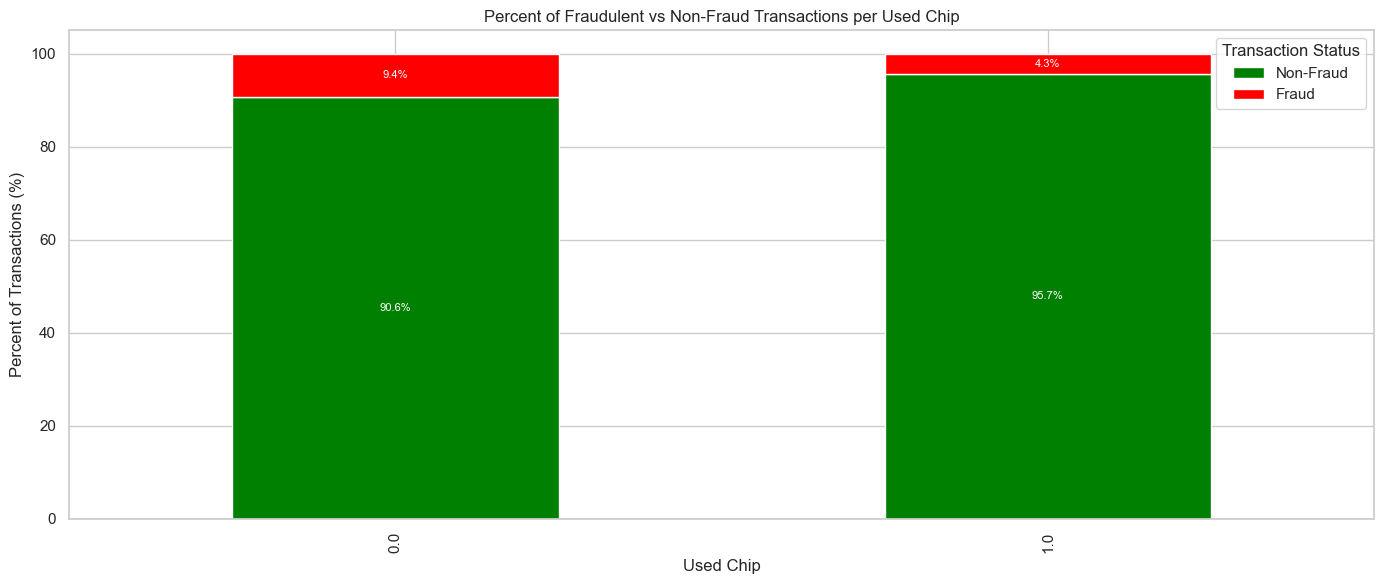

In [30]:
# Stacked percent bar by used_chip (Fraud=red, Non-Fraud=green) — uses all data
sns.set_theme(style='whitegrid')

df = card_data[['used_chip', 'fraud']].copy()
df['is_fraud'] = df['fraud'].astype(str).str.lower().isin(['1','true','yes','y','fraud','fraudulent','fraudulant'])

# Group counts per used_chip and fraud flag
counts = df.groupby(['used_chip', 'is_fraud']).size().unstack(fill_value=0)
counts = counts.reindex(columns=[False, True], fill_value=0)  # Non-Fraud, Fraud

# Convert to percentages per used_chip
pct = counts.div(counts.sum(axis=1), axis=0) * 100
pct = pct.sort_values(by=True, ascending=False)

# Plot stacked percent bars
colors = ['green', 'red']  # Non-Fraud, Fraud
ax = pct.plot(kind='bar', stacked=True, color=colors, figsize=(14,6))
ax.set_xlabel('Used Chip')
ax.set_ylabel('Percent of Transactions (%)')
ax.set_title('Percent of Fraudulent vs Non-Fraud Transactions per Used Chip')
ax.legend(['Non-Fraud', 'Fraud'], title='Transaction Status')
plt.xticks(rotation=90)

# Add percent labels for sufficiently large segments
for p in ax.patches:
    h = p.get_height()
    if h > 0.5:
        ax.text(p.get_x() + p.get_width() / 2, p.get_y() + h / 2, f'{h:.1f}%',
                ha='center', va='center', color='white', fontsize=8)

plt.tight_layout()

Do that again but with online_order instead of used_chip. Use all the data, not just the top 20.

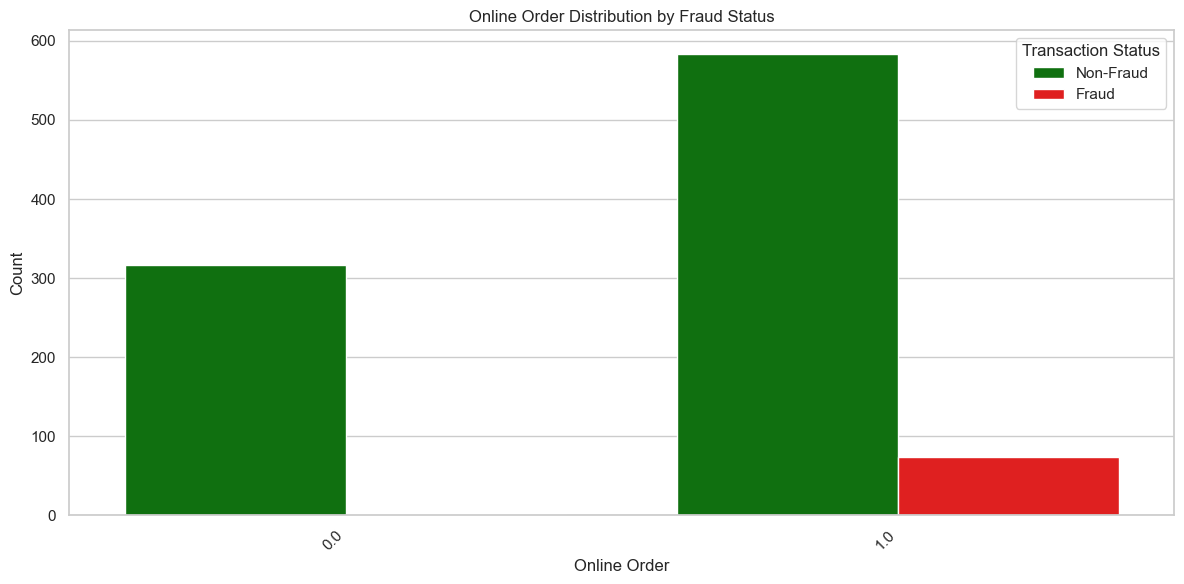

<Figure size 1400x600 with 0 Axes>

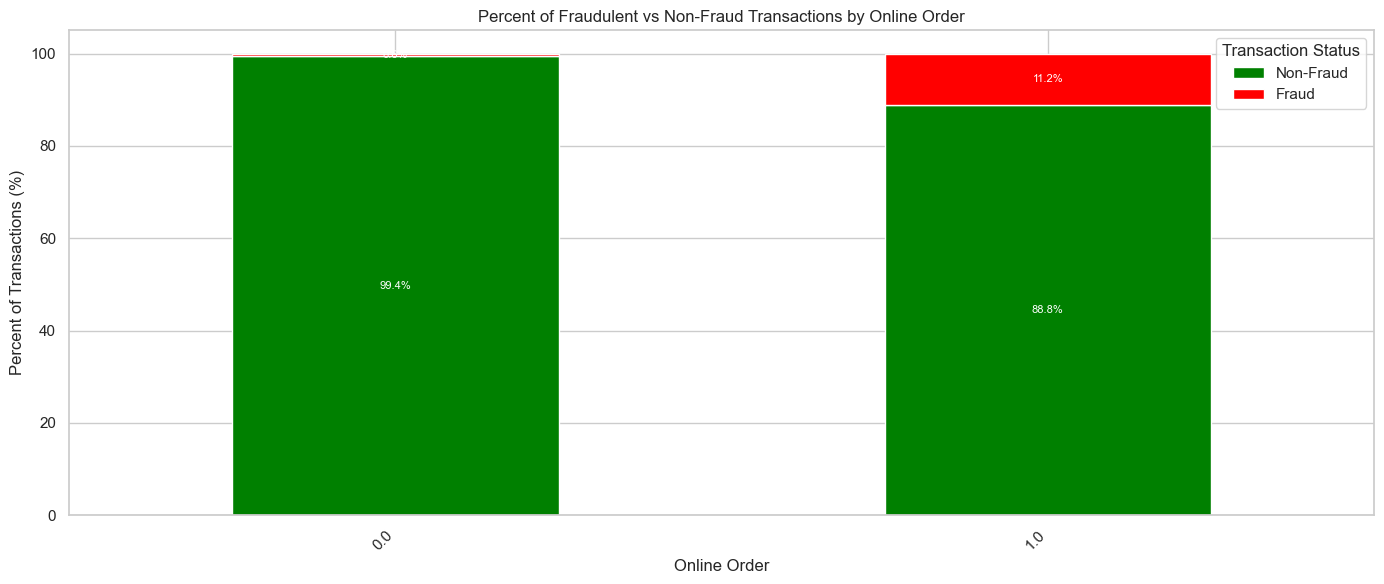

In [31]:
# Countplot of online_order with fraud as hue (using all data)
plt.figure(figsize=(12,6))
df_plot = card_data[['online_order','fraud']].dropna()

# Palette: map common truthy fraud labels to red, others to green
unique_fraud_vals = df_plot['fraud'].unique()
palette = {
        v: ('red' if str(v).lower() in ['1','true','yes','y','fraud','fraudulent','fraudulant'] else 'green')
        for v in unique_fraud_vals
}

sns.countplot(
        x='online_order',
        hue='fraud',
        data=df_plot,
        palette=palette
)

plt.title('Online Order Distribution by Fraud Status')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(['Non-Fraud','Fraud'], title='Transaction Status')
plt.tight_layout()

# Stacked percent bar by online_order (Fraud=red, Non-Fraud=green) using all data
sns.set_theme(style='whitegrid')
df = card_data[['online_order','fraud']].copy()
df['is_fraud'] = df['fraud'].astype(str).str.lower().isin(['1','true','yes','y','fraud','fraudulent','fraudulant'])

counts = df.groupby(['online_order','is_fraud']).size().unstack(fill_value=0)
counts = counts.reindex(columns=[False, True], fill_value=0)  # Non-Fraud, Fraud

# Convert to percent per online_order
pct = counts.div(counts.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14,6))
ax = pct.plot(kind='bar', stacked=True, color=['green','red'], figsize=(14,6))
ax.set_xlabel('Online Order')
ax.set_ylabel('Percent of Transactions (%)')
ax.set_title('Percent of Fraudulent vs Non-Fraud Transactions by Online Order')
ax.legend(['Non-Fraud','Fraud'], title='Transaction Status')
plt.xticks(rotation=45, ha='right')

# Add percent labels for segments large enough to show
for p in ax.patches:
        h = p.get_height()
        if h > 0.5:
                ax.text(p.get_x() + p.get_width() / 2, p.get_y() + h / 2, f'{h:.1f}%',
                        ha='center', va='center', color='white', fontsize=8)

plt.tight_layout()

Make an seaborn scatterplot distance_from_last_transaction vs ratio_to_median_purchase_price from the card_data DataFrame. Use the fraud column as the hue. Make red fraudulant data and green non-fraudulant data and include labels in the legend.

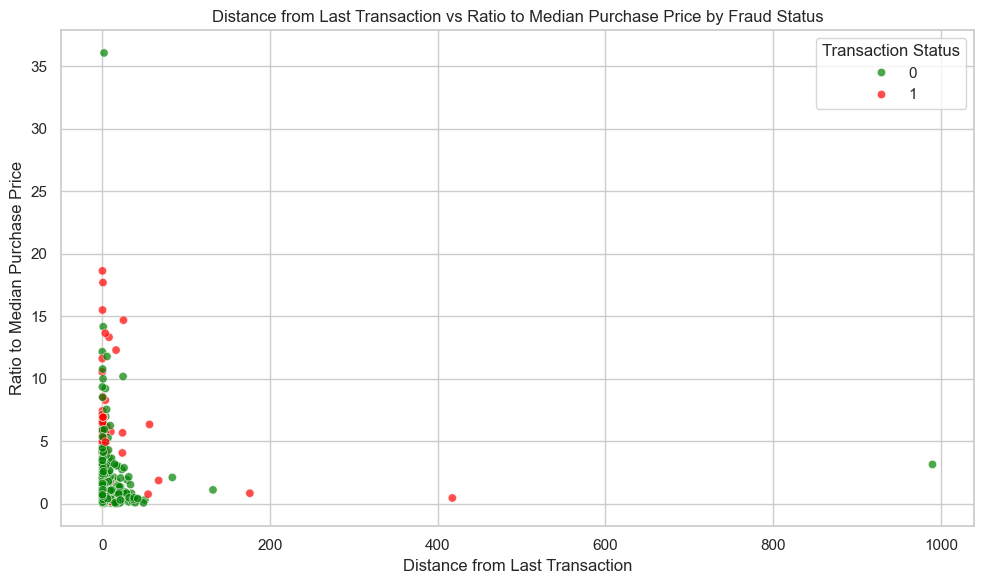

In [32]:
palette = {0: 'green', 1: 'red'}
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=card_data,
    x='distance_from_last_transaction',
    y='ratio_to_median_purchase_price',
    hue='fraud',
    palette=palette,
    alpha=0.7
)
plt.title('Distance from Last Transaction vs Ratio to Median Purchase Price by Fraud Status')
plt.xlabel('Distance from Last Transaction')
plt.ylabel('Ratio to Median Purchase Price')
plt.legend(title='Transaction Status')
plt.tight_layout()

Make an seaborn scatterplot 'distance_from_home' vs 'ratio_to_median_purchase_price' from the card_data DataFrame. Use the 'fraud' column as the hue. Make red fraudulant data and green non-fraudulant data and include labels in the legend.

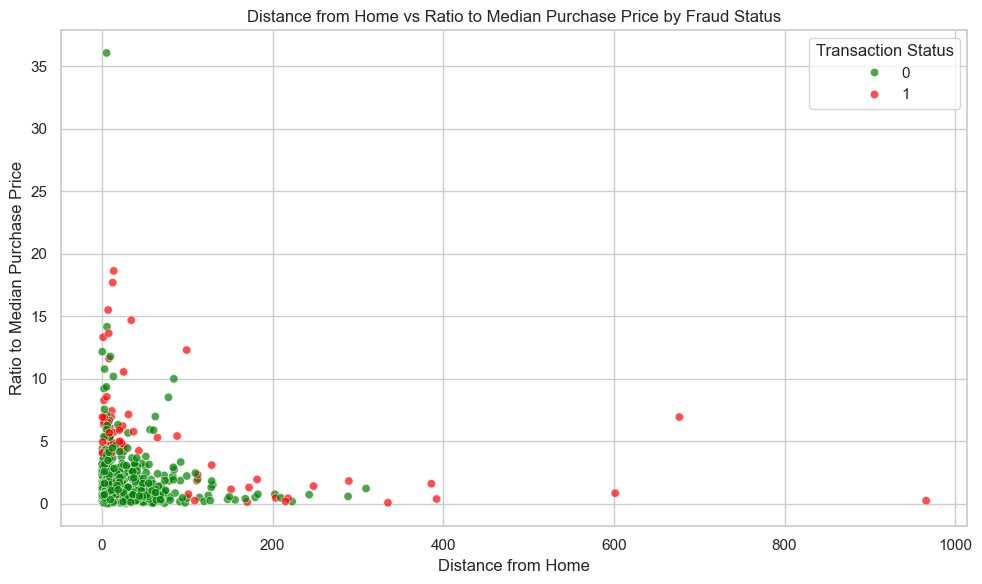

In [33]:
# Scatterplot: distance_from_home vs ratio_to_median_purchase_price colored by fraud status
palette = {0: 'green', 1: 'red'}
plt.figure(figsize=(10,6))
ax = sns.scatterplot(
    data=card_data,
    x='distance_from_home',
    y='ratio_to_median_purchase_price',
    hue='fraud',
    palette=palette,
    alpha=0.7,
)
ax.set_title('Distance from Home vs Ratio to Median Purchase Price by Fraud Status')
ax.set_xlabel('Distance from Home')
ax.set_ylabel('Ratio to Median Purchase Price')
ax.legend(title='Transaction Status')
plt.tight_layout()